In [15]:
#example process how to use AFR functions
#import necessary nodules and functions
import pandas as pd
import numpy as np
from utils.checkdata import checkdata  
from utils.corsel import corsel
from utils.opt_size import opt_size
from utils.reg_test import reg_test
from utils.dec_plot import dec_plot
from utils.vif_reg import vif_reg
from utils.pt_multi import pt_multi
from utils.pt_one import pt_one
from utils.regsel_f import regsel_f
from utils.check_betas import check_betas
from utils.aic_score import aic_score
from utils.bic_score import bic_score
from utils.sbic_score import sbic_score
from utils.adjr2_score import adjr2_score

In [2]:
#get information about the function by help()
help(checkdata)

Help on function checkdata in module utils.checkdata:

checkdata(dataset)
    Preliminary check of dataset for missing values, numeric format, outliers.
    
    Args:
        ------
        dataset (pandas.DataFrame): name of the dataset for analysis for preliminary check
    
    Returns
        ------
        str: A conclusion of the preliminary analysis.
    
    Example:
        ------
        >>> import pandas as pd
        >>> from utils import checkdata
        >>> d = pd.read_csv( "AFR/load/macroKZ.csv" )
        >>> checkdata.checkdata(d)
    
    Raises:
        ------
        FileNotFoundError: If the specified dataset cannot be found.
        pd.errors.EmptyDataError: If the specified dataset is empty.



In [2]:
#upload dataset(-s)
finrat = pd.read_csv('./load/finratKZ.csv')
macro = pd.read_csv('./load/macroKZ.csv')
macro.head()

,date,real_gdp,GDD_Agr_R,GDD_Min_R,GDD_Man_R,GDD_Elc_R,GDD_Con_R,GDD_Trd_R,GDD_Trn_R,GDD_Inf_R,...,cred_portfolio,coef_k1,coef_k3,provisions,percent_margin,com_inc,com_exp,oper_inc,oth_inc,DR
0,Q1-2010,2434.9,137.1,403.2,244.9,43.0,274.2,287.8,210.9,94.0,...,193.00,0.31,0.03,83.91,0.06,1125517.36,175988.45,3211104.05,411132.7,0.02
1,Q2-2010,2506.4,139.7,406.1,273.0,42.8,273.9,309.8,206.1,97.5,...,183.28,0.32,0.06,74.55,0.06,1509069.76,191369.75,3776480.95,369998.2,0.02
2,Q3-2010,2512.3,116.7,349.5,242.1,43.3,285.0,319.6,247.9,86.6,...,243.65,0.43,0.25,86.63,0.06,1811025.26,219077.65,3417365.05,361438.0,0.02
3,Q4-2010,2816.4,125.2,456.9,279.4,44.1,287.0,349.4,305.4,143.7,...,232.46,0.33,0.04,80.06,0.06,2059290.86,178291.85,3913204.35,390177.7,0.02
4,Q1-2011,2588.7,135.5,410.9,260.1,44.4,274.9,319.9,219.2,108.6,...,234.03,0.32,0.04,78.81,0.06,1784063.16,239975.45,4062113.55,411328.5,0.03


In [3]:
#preliminary check data for missing values, numeric format and outliers for further work
checkdata(macro)

There are 1 non-numeric values in the dataset.
There are no missing values in the dataset.
Rincpop_q column has outliers.
Rexppop_q column has outliers.
rurkzt column has outliers.
realest_comm column has outliers.
tonia_rate column has outliers.
rate_kzt_corp_0y_1y column has outliers.
realest_resed_prim_rus column has outliers.
realest_resed_sec_rus column has outliers.
cred_portfolio column has outliers.
oth_inc column has outliers.


In [3]:
#choose potential regressors to check them for multicollinearity
data = macro[['poil', 'cpi', 'usdkzt', 'GDP_DEF', 'exp', 'GDD_Agr_R', 'rurkzt', 'tonia_rate', 'cred_portfolio', 'fed_fund_rate']]

In [5]:
#check for multicollinearity by setting threshold and numeric/boolean format
corsel(data)

,poil,cpi,usdkzt,GDP_DEF,exp,GDD_Agr_R,rurkzt,tonia_rate,cred_portfolio,fed_fund_rate
poil,1.000,-0.468,-0.617,-0.374,0.946,-0.289,-0.109,-0.641,-0.189,-0.292
cpi,-0.468,1.000,0.967,0.877,-0.354,0.461,0.676,0.465,0.829,0.400
usdkzt,-0.617,0.967,1.000,0.844,-0.518,0.476,0.686,0.544,0.751,0.453
GDP_DEF,-0.374,0.877,0.844,1.000,-0.262,0.745,0.589,0.394,0.748,0.352
exp,0.946,-0.354,-0.518,-0.262,1.000,-0.205,-0.024,-0.592,-0.117,-0.222
GDD_Agr_R,-0.289,0.461,0.476,0.745,-0.205,1.000,0.320,0.300,0.325,0.229
rurkzt,-0.109,0.676,0.686,0.589,-0.024,0.320,1.000,0.027,0.462,0.485
tonia_rate,-0.641,0.465,0.544,0.394,-0.592,0.300,0.027,1.000,0.409,0.162
cred_portfolio,-0.189,0.829,0.751,0.748,-0.117,0.325,0.462,0.409,1.000,0.044
fed_fund_rate,-0.292,0.400,0.453,0.352,-0.222,0.229,0.485,0.162,0.044,1.000


In [4]:
#import module to build OLS regression
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [5]:
#build OLS regression
model = ols('real_gdp ~ poil + cpi + usdkzt + imp', data = macro).fit()

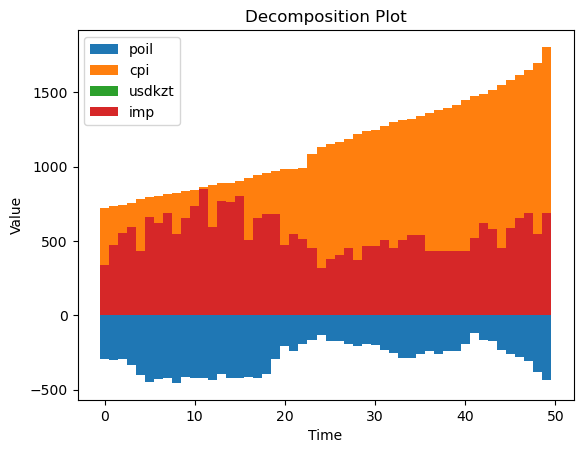

In [8]:
#plot the decomposition of the regressors to the regression
dec_plot(model, macro)

In [9]:
#check for multicollinearity by VIF coefficient
vif_reg(model)


If statistics exceeds 5, please be aware of multicollinearity.

          VIF
poil     50.1
cpi      3.07
usdkzt  34.36
imp     42.25


In [10]:
#check whether there are enough observations for your regression
opt_size(model)

There are 50 observations in the dataset, which is sufficient for this model with 4 independent variable(s).


In [6]:
#check model for violation/compliance with Gauss-Markov assumptions
reg_test(model)

        Gauss-Markov assumptions tests       
Test                test statistic    p-value
Breusch-Pagan       8.88              0.06
Breusch-Godfrey     40.43             0.0
Durbin-Watson       2.17              None
Godfrey-Quandt      4.05              0.0


In [16]:
#AIC metrics for the model
print(aic_score(model))

550.735


In [17]:
#BIC metrics for the model
print(bic_score(model))

560.295


In [18]:
#SBIC metrics for the model
print(sbic_score(model))

578.995


In [19]:
#Adj R2 metrics for the model
print(adjr2_score(model))

0.697


/Users/aluamakhmetova/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/aluamakhmetova/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/aluamakhmetova/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/aluamakhmetova/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Selected regressors: ('GDD_Agr_R',) based on the scoring criteria aic

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     64.11
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           2.15e-10
Time:                        23:52:31   Log-Likelihood:                -352.68
No. Observations:                  50   AIC:                             709.4
Df Residuals:                      48   BIC:                             713.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

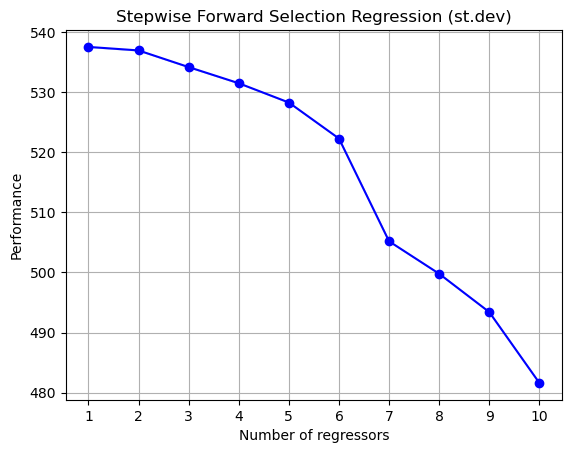

In [8]:
#select best model based on stepwise forward regression from your chosen regression
X = macro[['poil', 'cpi', 'usdkzt', 'GDP_DEF', 'exp', 'GDD_Agr_R', 'rurkzt', 'tonia_rate', 'cred_portfolio', 'fed_fund_rate']]
y = macro['real_gdp']
regsel_f(X, y, macro, scoring = 'aic')

In [13]:
#all possible regression subsets
#customize the width of the columns
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
check_betas(X, y, criterion = 'bic', intercept = False)

Based on the given predictors 1023 models can be generated based on the scoring criteria bic. See below:


,Subset,Predictors
0,1,[poil]
1,2,[cpi]
2,3,[usdkzt]
3,4,[GDP_DEF]
4,5,[exp]
...,...,...
1018,1019,"[poil, cpi, usdkzt, exp, GDD_Agr_R, rurkzt, tonia_rate, cred_portfolio, fed_fund_rate]"
1019,1020,"[poil, cpi, GDP_DEF, exp, GDD_Agr_R, rurkzt, tonia_rate, cred_portfolio, fed_fund_rate]"
1020,1021,"[poil, usdkzt, GDP_DEF, exp, GDD_Agr_R, rurkzt, tonia_rate, cred_portfolio, fed_fund_rate]"
1021,1022,"[cpi, usdkzt, GDP_DEF, exp, GDD_Agr_R, rurkzt, tonia_rate, cred_portfolio, fed_fund_rate]"


,Index,Subset,Adjusted R Squared,t-test
0,1,[poil],0.847,16.685
1,2,[cpi],0.973,42.259
2,3,[usdkzt],0.914,23.067
3,4,[GDP_DEF],0.959,34.012
4,5,[exp],0.886,19.701
...,...,...,...,...
1018,1019,"[poil, cpi, usdkzt, exp, GDD_Agr_R, rurkzt, tonia_rate, cred_portfolio, fed_fund_rate]",0.998,9.077
1019,1020,"[poil, cpi, GDP_DEF, exp, GDD_Agr_R, rurkzt, tonia_rate, cred_portfolio, fed_fund_rate]",0.997,5.715
1020,1021,"[poil, usdkzt, GDP_DEF, exp, GDD_Agr_R, rurkzt, tonia_rate, cred_portfolio, fed_fund_rate]",0.995,4.172
1021,1022,"[cpi, usdkzt, GDP_DEF, exp, GDD_Agr_R, rurkzt, tonia_rate, cred_portfolio, fed_fund_rate]",0.998,6.581


,Subset,Predictors
0,1,[poil]
1,2,[cpi]
2,3,[usdkzt]
3,4,[GDP_DEF]
4,5,[exp]
...,...,...
1018,1019,"[poil, cpi, usdkzt, exp, GDD_Agr_R, rurkzt, tonia_rate, cred_portfolio, fed_fund_rate]"
1019,1020,"[poil, cpi, GDP_DEF, exp, GDD_Agr_R, rurkzt, tonia_rate, cred_portfolio, fed_fund_rate]"
1020,1021,"[poil, usdkzt, GDP_DEF, exp, GDD_Agr_R, rurkzt, tonia_rate, cred_portfolio, fed_fund_rate]"
1021,1022,"[cpi, usdkzt, GDP_DEF, exp, GDD_Agr_R, rurkzt, tonia_rate, cred_portfolio, fed_fund_rate]"


In [16]:
#to check default probability of low default credit portfolio for 1 year

portfolio_distribution = np.array([10,20,30,40,10,20])
num_defaults = np.array([1, 2, 1, 0, 3, 2])
conf_level = 0.99
num_years = 3

pt_one(portfolio_distribution, num_defaults, conf_level)

Estimated probability of default: [0.314 0.282 0.384 0.348 0.314 0.348]


array([0.314, 0.282, 0.384, 0.348, 0.314, 0.348])

In [17]:
#to check default probability of low default credit portfolio for n years
pt_multi(portfolio_distribution, num_defaults, conf_level, num_years)

Estimated probability of default: [0.86  0.848 0.883 0.872 0.86  0.872]


array([0.86 , 0.848, 0.883, 0.872, 0.86 , 0.872])